<a href="https://colab.research.google.com/github/GuilhermeFMedici/Data_Analysis_Mini_Project/blob/main/Projeto_An%C3%A1lise_de_Dados_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mini Projeto de Análise de Dados

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Importando os Arquivos

In [3]:
import pandas as pd

clientes_df =  pd.read_csv(r'/content/drive/ My Drive/Analise de dados/CadastroClientes.csv', sep=';', decimal = ',')
funcionarios_df = pd.read_csv(r'/content/drive/ My Drive/Analise de dados/CadastroFuncionarios.csv', sep=';', decimal = ',')
serviços_df = pd.read_excel(r'/content/drive/ My Drive/Analise de dados/BaseServiçosPrestados.xlsx')

#retirar colunas Estado Civil e Cargo da tabela de funcionarios
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)

display(clientes_df)
display(funcionarios_df)
display(serviços_df)
funcionarios_df.info()

,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Funcionário  114 non-null    int64  
 1   Nome Completo   114 non-null    object 
 2   Salario Base    114 non-null    int64  
 3   Impostos        114 non-null    float64
 4   Beneficios      114 non-null    float64
 5   VT              114 non-null    int64  
 6   VR              114 non-null    float64
 7   Area            114 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 7.2+ KB


### 1 - Folha Salarial

In [4]:
#funcionarios_df['Impostos'] = pd.to_numeric(funcionarios_df['Impostos'])
#funcionarios_df['Beneficios'] = funcionarios_df['Beneficios'].astype(float)
#funcionarios_df['VR'] = funcionarios_df['VR'].astype(float)
#funcionarios_df.info()

funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] +	funcionarios_df['Impostos'] +	funcionarios_df['Beneficios'] +	funcionarios_df['VT'] +	funcionarios_df['VR']
print(sum(funcionarios_df['Salario Total']))

2717493.22


###2 - Faturamento da Empresa

In [5]:
faturamento_df = serviços_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on= 'ID Cliente' )
faturamento_df['Faturamento Total'] = faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal']
print(sum(faturamento_df['Faturamento Total']))

5519160


### 3 - % Funcionários Fecharam Contrato

In [ ]:
qtde_funcionario_fecharam_contrato = len(serviços_df['ID Funcionário'].unique())
qtde_funcionario_total = len(funcionarios_df['ID Funcionário'])
print('Percentual de funcionários que fecharam contrato: {:.2%}'. format(qtde_funcionario_fecharam_contrato / qtde_funcionario_total))

Percentual de funcionários que fecharam contrato: 86.84%


### 4 - Qtde Contratos por Área

Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


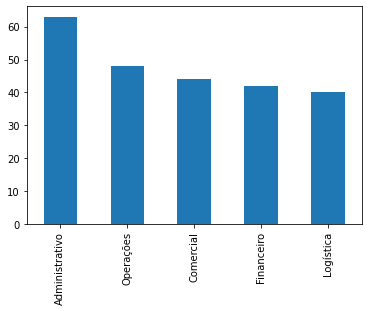

In [ ]:
contrato_area_df = serviços_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')
contrato_area_qtde = contrato_area_df['Area'].value_counts()
print(contrato_area_qtde)
contrato_area_qtde.plot(kind='bar')

### 5 - Funicionários por Área

Comercial         26
Administrativo    26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


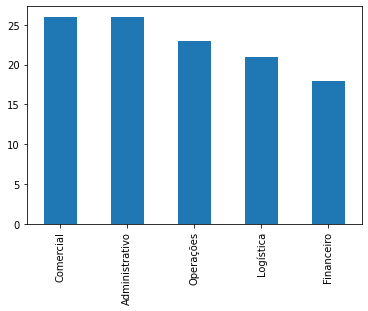

In [ ]:
funcionarios_area = funcionarios_df['Area'].value_counts()
print(funcionarios_area)
funcionarios_area.plot(kind='bar')

### 6 - Ticket Médio Mensal

In [6]:
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print('Ticket Médio Mensal: R${:,.2f}'.format(ticket_medio))

Ticket Médio Mensal: R$2,502.56
